In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path=("/content/drive/MyDrive/Purav_Brand & Mkt  Promotions and Outreach Executive/cwurData.csv")
df= pd.read_csv(path)


In [ ]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [ ]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [ ]:
df.columns


Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [ ]:
df.shape

(2200, 14)

In [ ]:
df.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [ ]:

df.isnull().sum()





world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-85-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


<ipython-input-86-c5c0123c7d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['publications'], kde=False, bins=20)


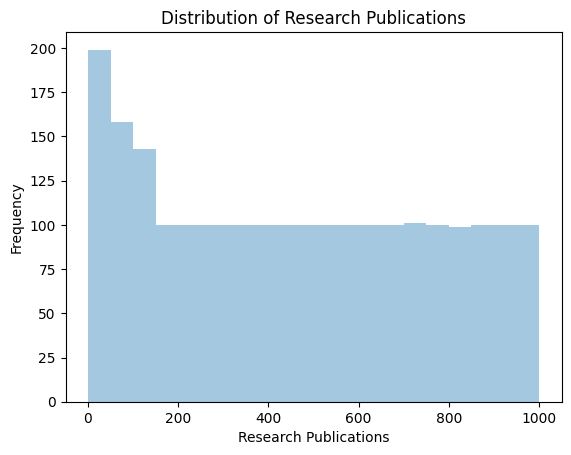

In [ ]:
# Distribution of research publications
sns.distplot(df['publications'], kde=False, bins=20)
plt.title('Distribution of Research Publications')
plt.xlabel('Research Publications')
plt.ylabel('Frequency')
plt.show()



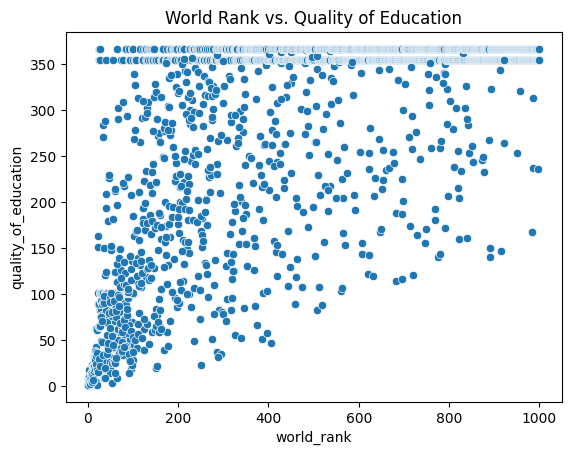

In [ ]:
sns.scatterplot(x='world_rank', y='quality_of_education', data=df)
plt.title('World Rank vs. Quality of Education')
plt.show()


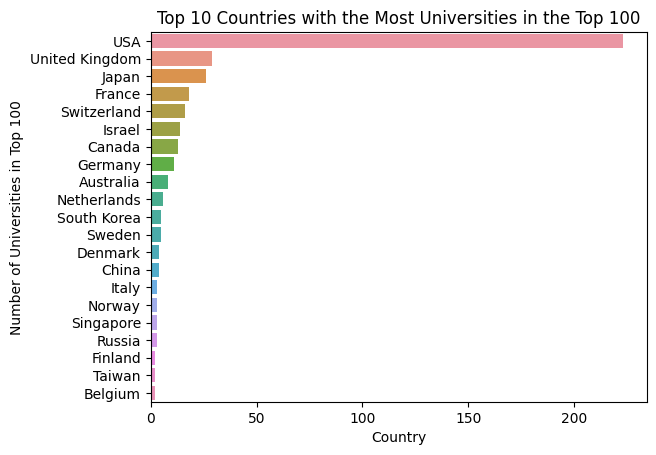

In [ ]:
top_countries = df.loc[df['world_rank'] <= 100, 'country'].value_counts().head(100)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries with the Most Universities in the Top 100')
plt.xlabel('Country')
plt.ylabel('Number of Universities in Top 100')
plt.show()

<ipython-input-89-32098b262d2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


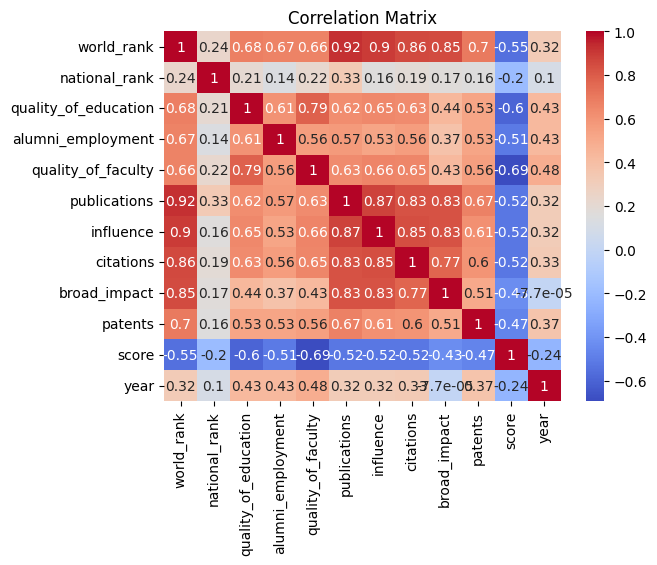

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
X = df.drop(['world_rank', 'institution', 'country'], axis=1)
y = df['world_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df.d
df.dropna(inplace=True)
encoder = LabelEncoder()
df['country'] = encoder.fit_transform(data['country'])
df['top_rank'] = np.where(data['national_rank']<=50, 1, 0)
X = df.drop(['national_rank', 'top_rank'], axis=1)
y = df['top_rank']
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_scaled)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#lr = LinearRegression()
#lr.fit(X_train_scaled, y_train)
#y_pred_lr = lr.predict(X_test_scaled)
#mse_lr = mean_squared_error(y_test, y_pred_lr)
#r2_lr = r2_score(y_test, y_pred_lr)
#print("Linear Regression Mean Squared Error: ", mse_lr)
#print("Linear Regression R2 Score: ", r2_lr)



Linear Regression Mean Squared Error:  107821333995.19624
Linear Regression R2 Score:  -1184074.3814532794


In [ ]:

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
print("MSE ", mse)
print("R2 SCORE", r2_dt)


MSE  229704.04090909092
R2 SCORE -1.5225703465411526


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor Mean Squared Error: ",mse_rf)
print("Random Forest Regressor R2 Score ",r2_rf)

Random Forest Regressor Mean Squared Error:  224153.15080909088
Random Forest Regressor R2 Score  -1.4616114243221454


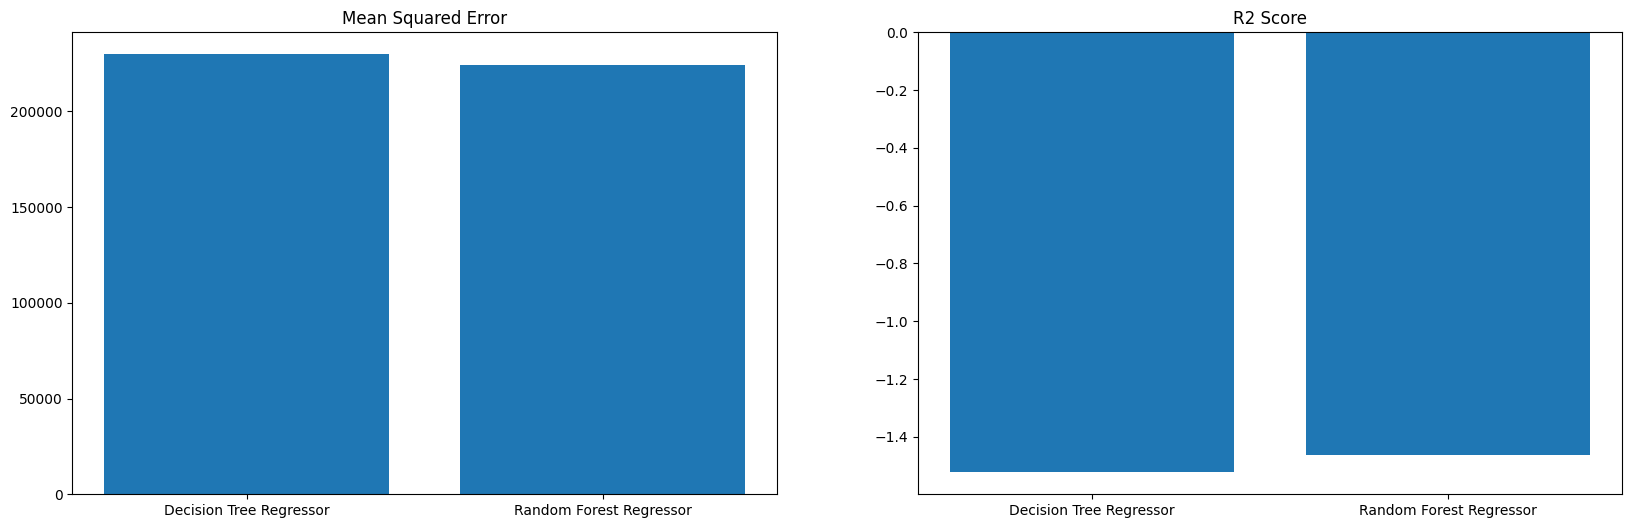

In [ ]:
models = [ 'Decision Tree Regressor', 'Random Forest Regressor']
mse_scores= [ mse, mse_rf]
r2_scores = [ r2_dt, r2_rf]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax[0].bar(models, mse_scores)
ax[0].set_title("Mean Squared Error")
ax[1].bar(models, r2_scores)
ax[1].set_title("R2 Score")
plt.show()

In [ ]:
#Conclusion As the r2 score for random forest is greater it is a better model to predict the ranking of the university